In [1]:
%matplotlib qt
import mne
import utils
import matplotlib.pyplot as plt
import utils


In [2]:
epoch_type = 'evoked'
# epoch_type = 'pseudo-rs'

In [67]:
all_participants = ['VP07','VP08','VP09', 'VP10','VP11','VP12','VP13','VP14','VP18','VP19','VP20','VP23','VP24','VP25','VP26','VP27','VP28','VP29','VP30','VP31','VP32','VP33','VP35','VP36','VP37']
participant = all_participants[5]

# path = '/media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/' #icm-linux
path = '/Users/nicobruno/ownCloud/MW_eeg_data/minmarker/' #nico-mac
path2 = '/Users/nicobruno/ownCloud/MW_eeg_data/modmarker/'

folder = path + participant +'/'
file = participant + '_crop_rMean_minmarker.set'
file2 = path2+ participant + '_crop_rMean_trim10_modmarker6_interp.set'


In [68]:
epochs = mne.read_epochs(folder + participant + epoch_type + '_epo.fif', verbose = False)
epochs_clean = mne.read_epochs(folder + participant + epoch_type + 'ar-clean_epo.fif')
print(len(epochs), len(epochs_clean))
print((len(epochs) - len(epochs_clean)) *100/len(epochs) )

Reading /Users/nicobruno/ownCloud/MW_eeg_data/minmarker/VP12/VP12evokedar-clean_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
31 matching events found
No baseline correction applied
0 projection items activated
45 31
31.11111111111111


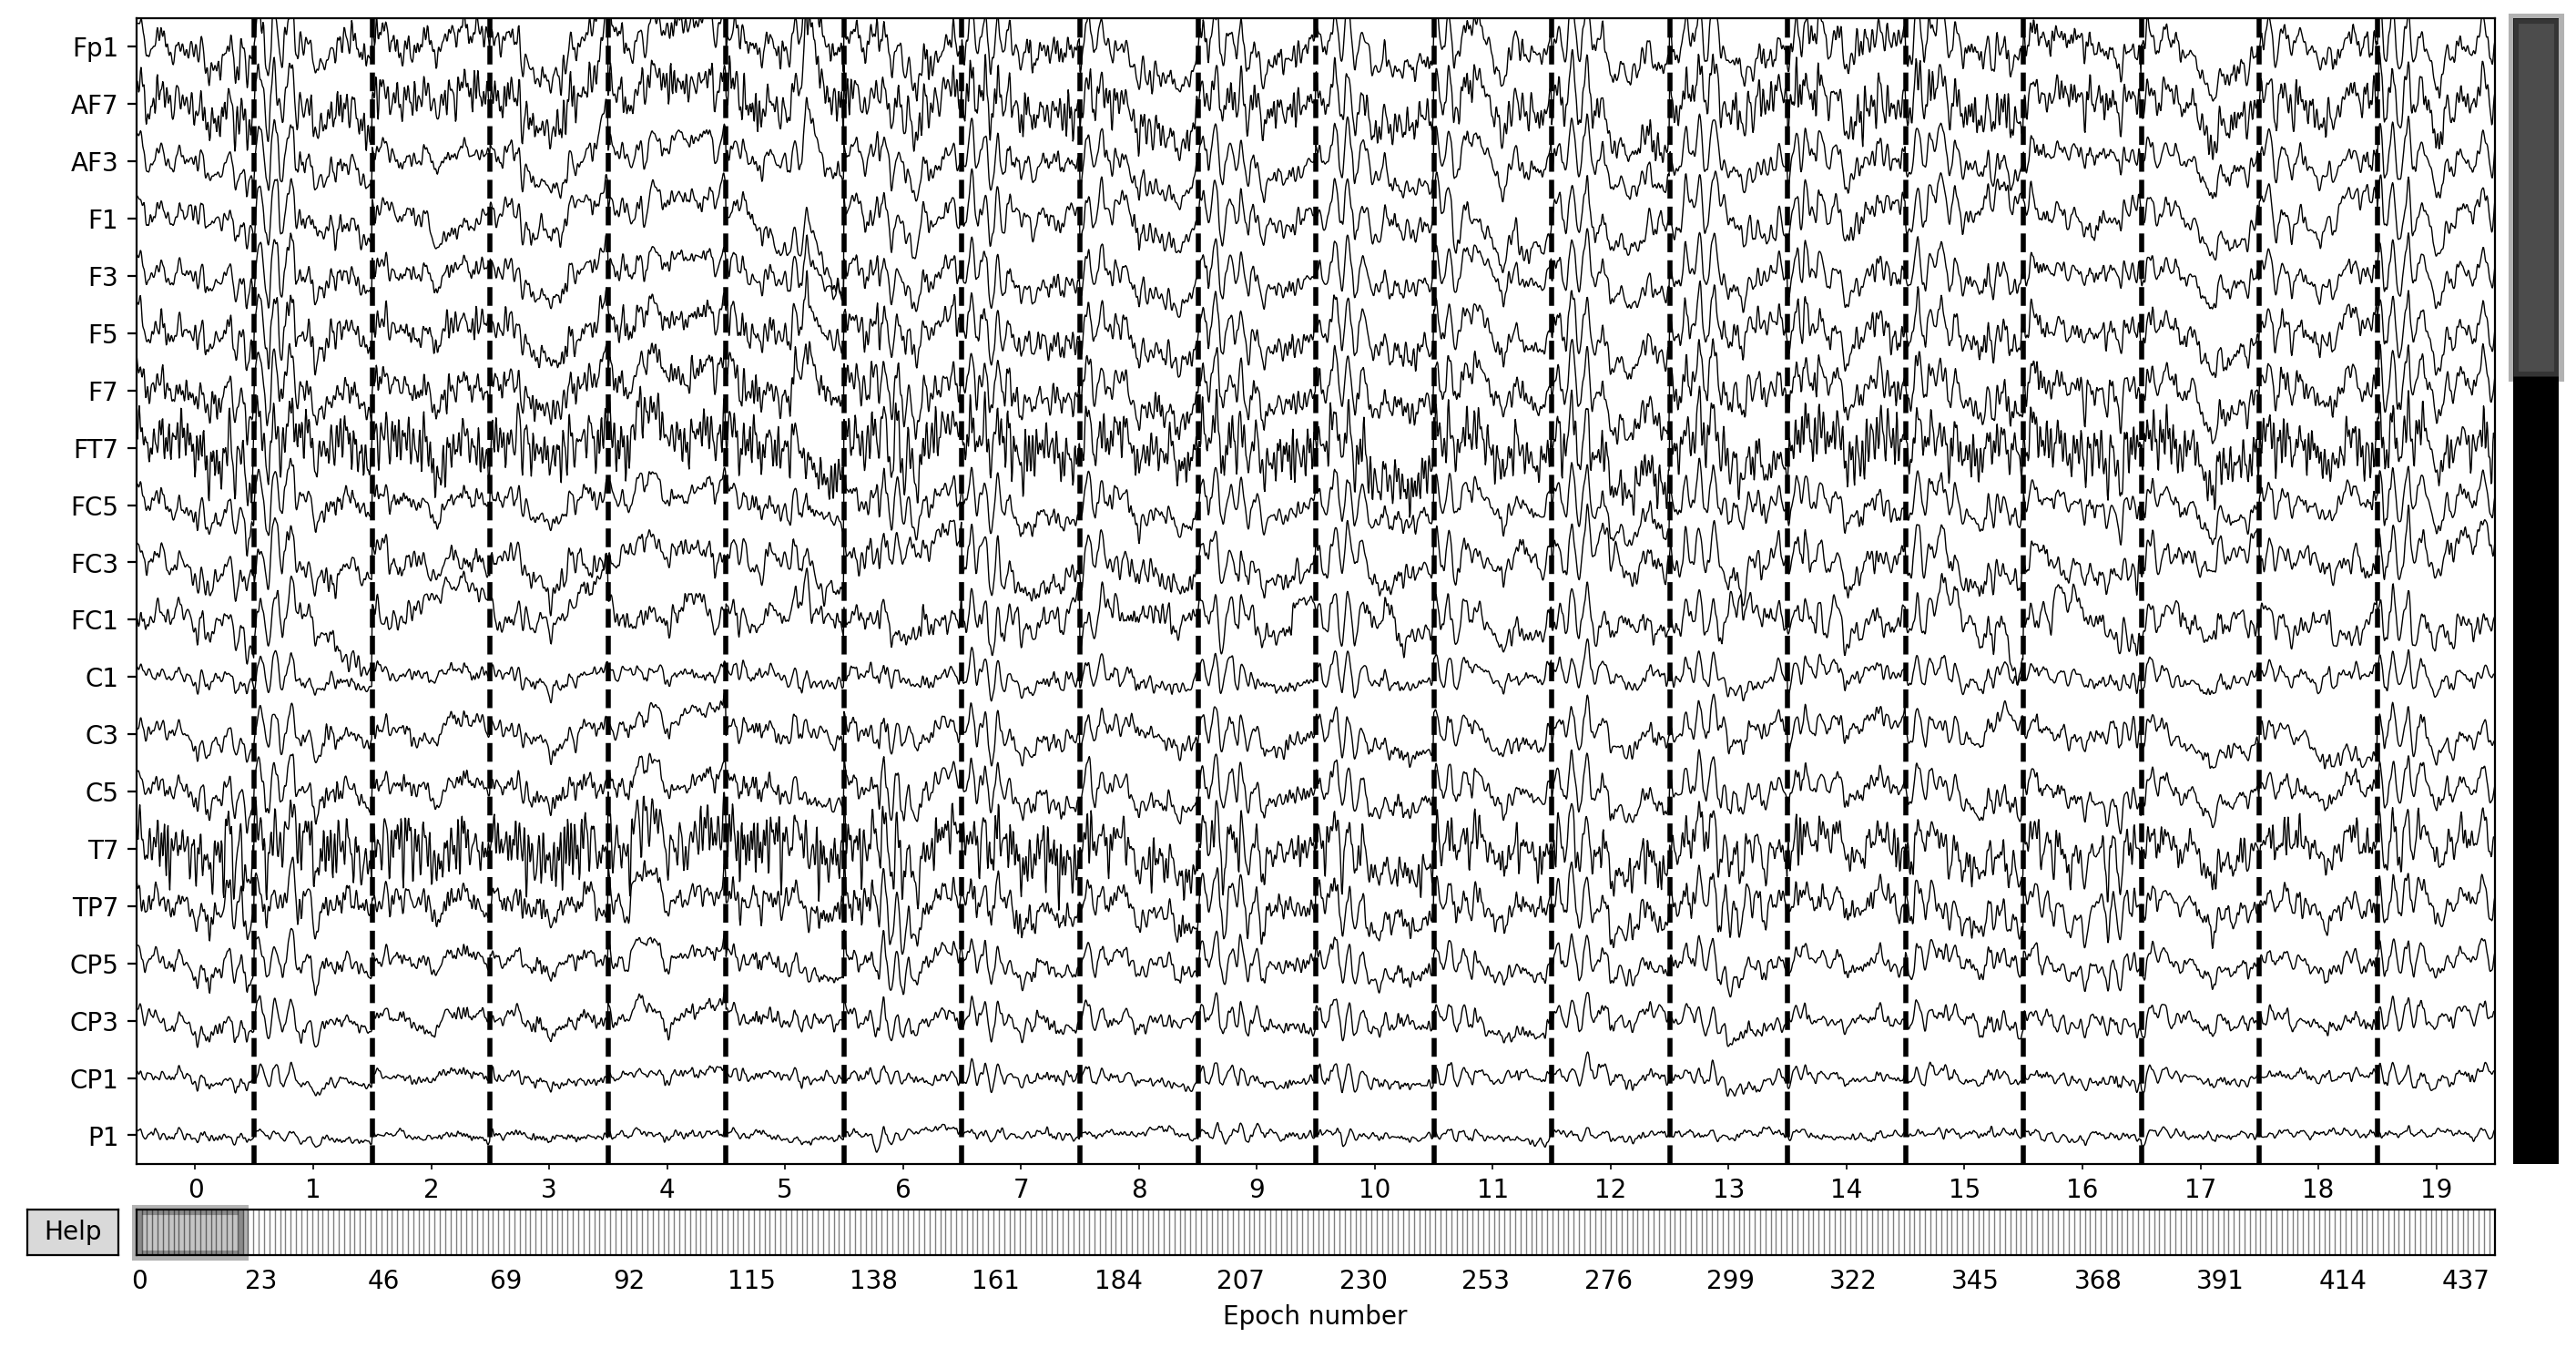

In [66]:
epochs.plot()

In [ ]:
epochs_ar = mne.read_epochs(folder + participant + epoch_type + 'ar-rereferenced_epo.fif', verbose = False)
epochs_manual = mne.read_epochs(folder + participant + epoch_type + 'rereferenced_epo.fif', verbose = False)

In [69]:
raw_min = mne.io.read_raw(folder + participant + 'filt_raw.fif', preload = True)
events, event_dict = utils.make_correct_labels(raw_min)
epochs_min=   utils.create_epochs(epoch_type = epoch_type, raw = raw_min, events =  events, event_id = event_dict)

raw_mod = mne.io.read_raw_eeglab(file2, verbose = False)
events_from_annot, event_dict = mne.events_from_annotations(raw_mod)


events_used = [ '1001', '1002', '1003', '1004', '1005','2000', 
               '20001', '20002', '20003', '20004', '20005',
               '2001', '2002', '2003', '2004', '2005',
                '30001', '30002', '30003', '30004', '30005', 
               '3001', '3002', '3003', '3004', '3005',
               '40001', '40002', '40003', '40004', '40005',
              '4001', '4002', '4003', '4004', '4005',
              '5001', '5002', '5003', '5004', '5005',
              '50001', '50002', '50003', '50004', '50005',]

list_of_interest = [event_dict[your_key] for your_key in events_used if
                 your_key in event_dict]
dict_of_interest = {your_key: event_dict[your_key]for your_key in events_used if
                 your_key in event_dict}

events_of_interest = mne.pick_events(events_from_annot, include=list_of_interest)

epochs_mod = utils.create_epochs(epoch_type = epoch_type, raw = raw_mod, events =  events_of_interest, event_id = dict_of_interest)

Opening raw data file /Users/nicobruno/ownCloud/MW_eeg_data/minmarker/VP12/VP12filt_raw.fif...
    Range : 0 ... 326222 =      0.000 ...  1304.888 secs
Ready.
Reading 0 ... 326222  =      0.000 ...  1304.888 secs...
Used Annotations descriptions: ['-999', '1', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '111', '12', '168', '17', '177', '185', '2', '201', '202', '203', '204', '205', '206', '207', '208', '232', '233', '234', '238', '239', '243', '251', '252', '253', '255', '3', '4', '5', '6', '74', '8', '80', '86', '9', '92', '99']
Used Annotations descriptions: ['-999', '1', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '111', '12', '168', '17', '177', '185', '2', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '201', '202', '203', '204', '205', '206', '207', '208', '232', '233', '234', '238', '239', '243', '251', '252', '253', '255', '3', '4', '40000', '40001'

<ipython-input-69-3186b10d3224>:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_mod = mne.io.read_raw_eeglab(file2, verbose = False)


In [ ]:
print(len(epochs_min), len(epochs_mod))

In [ ]:
epochs_mod

In [70]:
P3_electrodes =['FCz', 'FC1','FC2', 'C1', 'Cz', 'C2', 'CP1','CPz','CP2','P1', 'Pz','P2', 'PO3','POz','PO4' ] 
epochs_ar = epochs_ar.pick_channels(P3_electrodes)
epochs_manual = epochs_manual.pick_channels(P3_electrodes)

45 47


In [ ]:
epochs_mod

In [ ]:
P3_electrodes =['FCz', 'FC1','FC2', 'C1', 'Cz', 'C2', 'CP1','CPz','CP2','P1', 'Pz','P2', 'PO3','POz','PO4' ] 
epochs_ar = epochs_ar.pick_channels(P3_electrodes)
epochs_manual = epochs_manual.pick_channels(P3_electrodes)

In [ ]:
evoked_ar = epochs_ar.average()
evoked_manual = epochs_manual.average()

In [ ]:
print(len(epochs_ar), len(epochs_manual))

In [ ]:
for combine in ('mean', 'median', 'gfp'):
    mne.viz.plot_compare_evokeds([evoked_ar, evoked_manual], picks='eeg', combine=combine)

In [ ]:
evoked_ar.plot()
evoked_manual.plot()